In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Indian_Extent = pd.read_excel(filepath, sheet_name='Indian-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Indian_Extent)
fp.date_time(Indian_Extent)

Extent       Date
0     376618.799 1979-01-01
1     211788.726 1979-02-01
2     262868.141 1979-03-01
3     698377.304 1979-04-01
4    1252407.727 1979-05-01
..           ...        ...
533  1520776.003 2023-06-01
534  2076164.165 2023-07-01
535  2731799.027 2023-08-01
536  3179384.692 2023-09-01
537  3301335.210 2023-10-01

[538 rows x 2 columns]

In [5]:
scaler = MinMaxScaler()
Indian_Extent['Extent'] = scaler.fit_transform(Indian_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 11
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Indian_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((516, 12, 1), (516,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Indian_model_LT11/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
45/53 [========================>.....] - ETA: 0s - loss: 0.1834 - root_mean_squared_error: 0.4283

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 8s 100ms/step - loss: 0.1889 - root_mean_squared_error: 0.4347 - val_loss: 0.1952 - val_root_mean_squared_error: 0.4418
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1620 - root_mean_squared_error: 0.4026

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.1669 - root_mean_squared_error: 0.4086 - val_loss: 0.1765 - val_root_mean_squared_error: 0.4201
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.1385 - root_mean_squared_error: 0.3721

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.1387 - root_mean_squared_error: 0.3725 - val_loss: 0.1551 - val_root_mean_squared_error: 0.3938
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1192 - root_mean_squared_error: 0.3452

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.1192 - root_mean_squared_error: 0.3453 - val_loss: 0.1355 - val_root_mean_squared_error: 0.3681
Epoch 5/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0989 - root_mean_squared_error: 0.3145

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0959 - root_mean_squared_error: 0.3097 - val_loss: 0.1178 - val_root_mean_squared_error: 0.3433
Epoch 6/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0759 - root_mean_squared_error: 0.2756

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.0768 - root_mean_squared_error: 0.2770 - val_loss: 0.0954 - val_root_mean_squared_error: 0.3089
Epoch 7/50
52/53 [============================>.] - ETA: 0s - loss: 0.0614 - root_mean_squared_error: 0.2478

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0618 - root_mean_squared_error: 0.2486 - val_loss: 0.0765 - val_root_mean_squared_error: 0.2766
Epoch 8/50
53/53 [==============================] - ETA: 0s - loss: 0.0462 - root_mean_squared_error: 0.2150

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0462 - root_mean_squared_error: 0.2150 - val_loss: 0.0572 - val_root_mean_squared_error: 0.2392
Epoch 9/50
53/53 [==============================] - ETA: 0s - loss: 0.0388 - root_mean_squared_error: 0.1971

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.0388 - root_mean_squared_error: 0.1971 - val_loss: 0.0520 - val_root_mean_squared_error: 0.2280
Epoch 10/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0321 - root_mean_squared_error: 0.1791

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0317 - root_mean_squared_error: 0.1782 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1950
Epoch 11/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0246 - root_mean_squared_error: 0.1569

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0246 - root_mean_squared_error: 0.1568 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1466
Epoch 12/50
53/53 [==============================] - ETA: 0s - loss: 0.0193 - root_mean_squared_error: 0.1391

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0193 - root_mean_squared_error: 0.1391 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 13/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1355

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0183 - root_mean_squared_error: 0.1352 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0941
Epoch 14/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.1332

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0174 - root_mean_squared_error: 0.1318 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0768
Epoch 15/50
52/53 [============================>.] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1119

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 5s 88ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0534
Epoch 16/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0144 - root_mean_squared_error: 0.1200 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0604
Epoch 17/50
53/53 [==============================] - ETA: 0s - loss: 0.0144 - root_mean_squared_error: 0.1198

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0144 - root_mean_squared_error: 0.1198 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 18/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1241

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0815
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0151 - root_mean_squared_error: 0.1230 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0639
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0172 - root_mean_squared_error: 0.1310 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0822
Epoch 22/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 23/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0145 - root_mean_squared_error: 0.1206 - val_loss: 0.0041 - val_root_mean_squared

INFO:tensorflow:Assets written to: Indian_model_LT11\assets


INFO:tensorflow:Assets written to: Indian_model_LT11\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0153 - root_mean_squared_error: 0.1239 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0472
Epoch 33/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0162 - root_mean_squared_error: 0.1272 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0138 - root_mean_squared_error: 0.1174 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0478
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0740
Epoch 36/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0151 - root_mean_squared_error: 0.1228 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0568
Epoch 37/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0035 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.6280340870221457 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

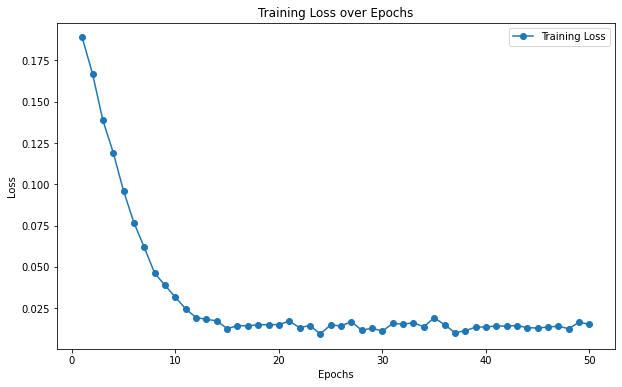

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

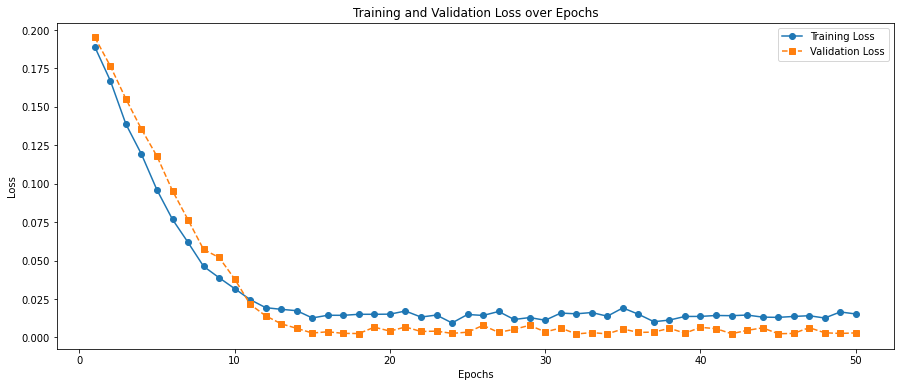

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Indian_model_LT11/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 16ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.046657429079456296
MAE : 0.03927055322434609


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

Train Predictions  Actual Extent
0        2.584524e+05     444914.605
1        5.459081e+05     827036.916
2        1.037790e+06    1142021.216
3        1.779037e+06    1885693.654
4        2.499493e+06    2542569.663
5        3.190472e+06    3107373.845
6        3.466250e+06    3488175.444
7        3.490417e+06    3746306.528
8        2.447140e+06    2942322.822
9        1.187101e+06    1507212.955
10       4.150542e+05     648507.437
11       2.993267e+05     352564.010
12       4.145620e+05     453587.503
13       7.382911e+05     841043.793
14       1.287721e+06    1433155.266
15       1.977760e+06    2163687.646
16       2.617585e+06    2848863.133
17       3.215652e+06    3420877.229
18       3.653468e+06    3752886.938
19       3.606180e+06    3778951.818
20       2.980322e+06    2892177.223
21       1.447034e+06    1467610.428
22       5.598377e+05     377930.941
23       2.604875e+05     146440.376
24       4.153181e+05     244356.473
25       7.759941e+05     612217.566
26       1.426331e+06    1261627.075
27       2.032060e+06    1720565.225
28       2.703580e+06    2564005.541
29       3.202525e+06    2983773.529
30       3.529530e+06    3372645.223
31       3.473412e+06    3589687.043
32       2.726331e+06    2669385.189
33       1.181500e+06    1095398.946
34       2.609460e+05     319828.826
35      -1.915148e+02     162541.182
36       1.092319e+05     179564.232
37       4.797150e+05     593196.107
38       1.054437e+06    1053508.835
39       1.799542e+06    1520776.003
40       2.465604e+06    2076164.165
41       3.028542e+06    2731799.027
42       3.515620e+06    3179384.692
43       3.455926e+06    3301335.210

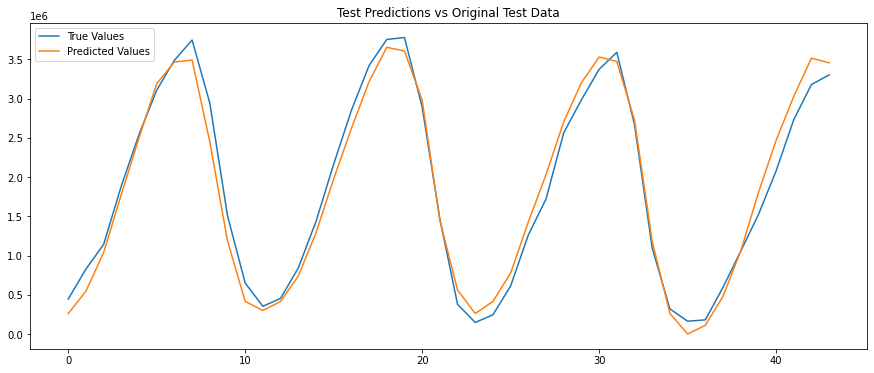

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

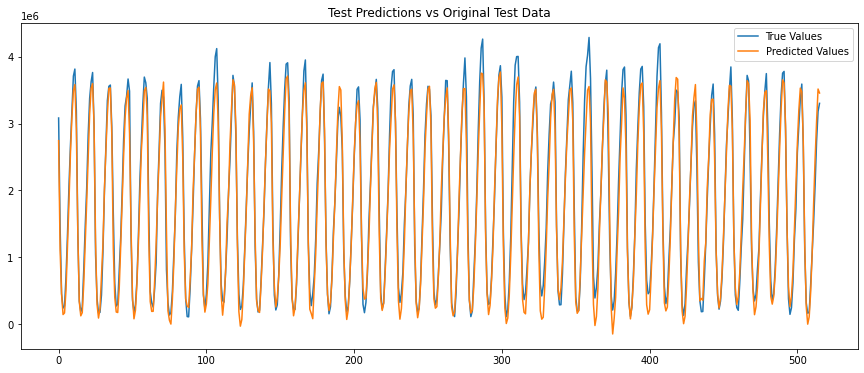

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()